#### The most commonly used deep learning algorithms can be classified into three groups.
##### Convolutional neural network
##### Recurrent neural network
##### Deep neural network

# Recipe 6-1. Building Sequential Neural Networks

In [1]:
import torch
import torch.nn.functional as F

In [2]:
# replace following class code with an easy sequential network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [3]:

# easy and fast way to build your network
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 1)
)

In [5]:
print(net2)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


# Recipe 6-2. Deciding the Batch Size Problem

In [6]:
import torch
import torch.utils.data as Data

torch.manual_seed(1234)    # reproducible

In [7]:
BATCH_SIZE = 5
# BATCH_SIZE = 8

In [8]:
x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)

In [11]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

In [12]:
for epoch in range(5):   # train entire dataset 5 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [7. 9. 3. 8. 6.] | batch y:  [4. 2. 8. 3. 5.]
Epoch:  0 | Step:  1 | batch x:  [10.  5.  2.  4.  1.] | batch y:  [ 1.  6.  9.  7. 10.]
Epoch:  1 | Step:  0 | batch x:  [9. 2. 1. 7. 5.] | batch y:  [ 2.  9. 10.  4.  6.]
Epoch:  1 | Step:  1 | batch x:  [ 6.  4. 10.  3.  8.] | batch y:  [5. 7. 1. 8. 3.]
Epoch:  2 | Step:  0 | batch x:  [10.  1.  3.  8.  5.] | batch y:  [ 1. 10.  8.  3.  6.]
Epoch:  2 | Step:  1 | batch x:  [6. 9. 4. 7. 2.] | batch y:  [5. 2. 7. 4. 9.]
Epoch:  3 | Step:  0 | batch x:  [2. 6. 3. 4. 7.] | batch y:  [9. 5. 8. 7. 4.]
Epoch:  3 | Step:  1 | batch x:  [ 8.  5. 10.  1.  9.] | batch y:  [ 3.  6.  1. 10.  2.]
Epoch:  4 | Step:  0 | batch x:  [ 3.  1. 10.  6.  9.] | batch y:  [ 8. 10.  1.  5.  2.]
Epoch:  4 | Step:  1 | batch x:  [5. 4. 8. 2. 7.] | batch y:  [6. 7. 3. 9. 4.]


In [17]:
BATCH_SIZE = 8
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

In [18]:
for epoch in range(5):   # train entire dataset 5 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [7. 6. 8. 9. 2. 5. 1. 4.] | batch y:  [ 4.  5.  3.  2.  9.  6. 10.  7.]
Epoch:  0 | Step:  1 | batch x:  [10.  3.] | batch y:  [1. 8.]
Epoch:  1 | Step:  0 | batch x:  [ 6. 10.  3.  7.  2.  5.  8.  9.] | batch y:  [5. 1. 8. 4. 9. 6. 3. 2.]
Epoch:  1 | Step:  1 | batch x:  [1. 4.] | batch y:  [10.  7.]
Epoch:  2 | Step:  0 | batch x:  [ 8. 10.  7.  1.  5.  6.  2.  9.] | batch y:  [ 3.  1.  4. 10.  6.  5.  9.  2.]
Epoch:  2 | Step:  1 | batch x:  [3. 4.] | batch y:  [8. 7.]
Epoch:  3 | Step:  0 | batch x:  [ 4.  8. 10.  6.  5.  2.  7.  3.] | batch y:  [7. 3. 1. 5. 6. 9. 4. 8.]
Epoch:  3 | Step:  1 | batch x:  [1. 9.] | batch y:  [10.  2.]
Epoch:  4 | Step:  0 | batch x:  [ 7.  5.  6. 10.  3.  8.  4.  2.] | batch y:  [4. 6. 5. 1. 8. 3. 7. 9.]
Epoch:  4 | Step:  1 | batch x:  [1. 9.] | batch y:  [10.  2.]


# Recipe 6-3. Deciding the Learning Rate Problem

In [19]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
torch.manual_seed(12345)    # reproducible

In [21]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [25]:
# Returns a new tensor with a dimension of size one inserted at the specified position.

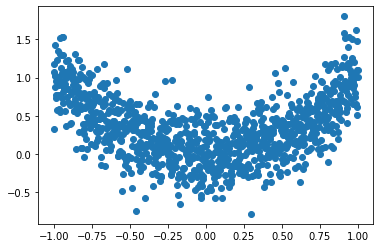

In [26]:
# sample dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.3*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [27]:
x[0:10]

tensor([[-1.0000],
        [-0.9980],
        [-0.9960],
        [-0.9940],
        [-0.9920],
        [-0.9900],
        [-0.9880],
        [-0.9860],
        [-0.9840],
        [-0.9820]])

In [28]:
y[0:10]

tensor([[0.3286],
        [1.1735],
        [1.0732],
        [0.8732],
        [1.0197],
        [1.0370],
        [1.4267],
        [0.7683],
        [0.9545],
        [0.7301]])

In [29]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

In [31]:
torch_dataset

In [32]:
loader

In [33]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [34]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [37]:
net_SGD

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)

In [38]:
net_Momentum

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)

In [39]:
net_RMSprop

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)

In [40]:
net_Adam

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)

In [41]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), 
                                  lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), 
                                      lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), 
                                   lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [42]:
opt_SGD

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [43]:
opt_Momentum

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.8
    nesterov: False
    weight_decay: 0
)

In [44]:
opt_RMSprop

RMSprop (
Parameter Group 0
    alpha: 0.9
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)

In [45]:
opt_Adam

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [49]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

In [50]:
loss_func

MSELoss()

# Recipe 6-4. Performing Parallel Training Problem

In [51]:
from tqdm import *
from time import *

In [58]:
EPOCH/100

0.12

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


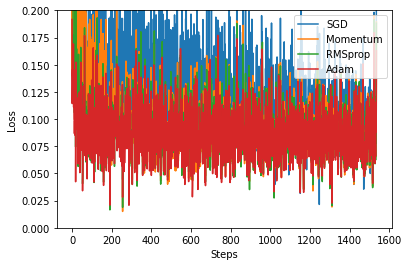

In [60]:
# training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.data)     # loss recoder

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()